In [1]:
from __future__ import print_function, division

# Standard imports to work with datasets, plots, etc.
import pylab as pl
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import json
import statsmodels.formula.api as smf

#loading rcParams from JSON template (created from Federica's fbb_matplotlibrc.json)
url = 'https://s3.amazonaws.com/sb-public/sbg389_matplotlibrc.json'

# Will use Citibike Data for the graph
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df=pd.read_csv(os.getenv("PUIDATA")+'/' + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
df['new date'] = df['date']
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,new date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,2015-01-01 00:04:00


In [4]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'new date'],
      dtype='object')

In [5]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender', 'date', 'new date'],  axis = 1, inplace = True)

In [6]:
df.head(4)

,tripduration,birth year
0,1346,1960.0
1,363,1963.0
2,346,1974.0
3,182,1969.0


In [7]:
df['tripDurationMin']=round(df['tripduration']/60,0)

df.head(4)

,tripduration,birth year,tripDurationMin
0,1346,1960.0,22.0
1,363,1963.0,6.0
2,346,1974.0,6.0
3,182,1969.0,3.0


In [8]:
df['age']=2015-df['birth year']
df.head(4)

,tripduration,birth year,tripDurationMin,age
0,1346,1960.0,22.0,55.0
1,363,1963.0,6.0,52.0
2,346,1974.0,6.0,41.0
3,182,1969.0,3.0,46.0


In [9]:
msk =  ((df.age > 0) & (df.tripDurationMin > 0) & (df.age < 80) & (df.tripDurationMin > 120))
df = df[msk]

df.head(4)

,tripduration,birth year,tripDurationMin,age
522,26819,1992.0,447.0,23.0
541,39626,1983.0,660.0,32.0
1939,9568,1973.0,159.0,42.0
2379,12768,1970.0,213.0,45.0


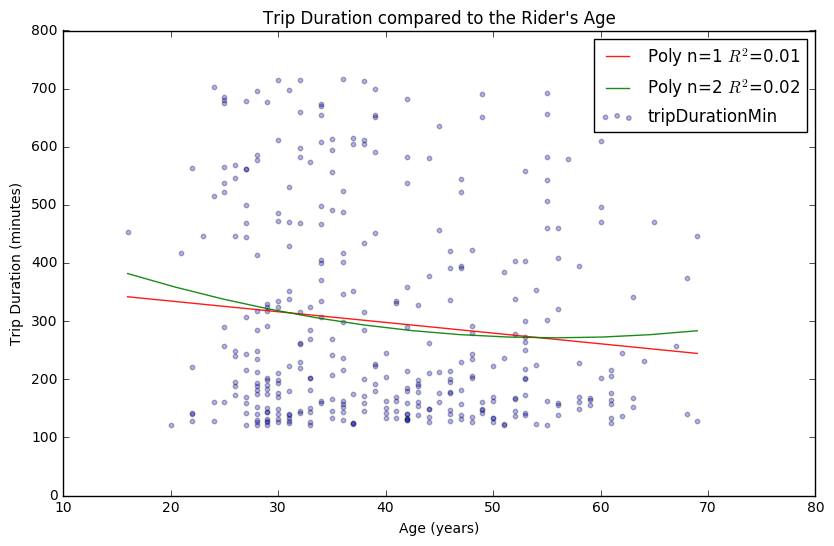

In [10]:
pl.figure(figsize=(6 * 1.618, 6))
pl.scatter(df.age, df.tripDurationMin, s=10, alpha=0.3)
pl.xlabel('Age (years)')
pl.ylabel('Trip Duration (minutes)')
pl.title("Trip Duration compared to the Rider's Age")
pl.xlim(10,80)
pl.ylim(0,800)

# points linearlyd space on lstats from minimum to maximom, 100 points
x = pd.DataFrame({'age': np.linspace(df.age.min(), df.age.max(), 13)})

# 1-st order polynomial
poly_1 = smf.ols(formula='tripDurationMin ~ 1 + age', data=df).fit()
pl.plot(x.age, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9, color = 'red')

# 2-nd order polynomial
poly_2 = smf.ols(formula='tripDurationMin ~ 1 + age + I(age ** 2.0)', data=df).fit()
pl.plot(x.age, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

plt.legend()
